# Concevez une application de santé publique

## Analyse de données exploratoire

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()

'c:\\Users\\doare\\OneDrive\\Bureau\\IML_Projet_2'

df = pd.read_csv('df_nettoyage.csv')
df.shape

In [3]:
df = pd.read_parquet('df_nettoyage.pq')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457718 entries, 0 to 457717
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   code                457718 non-null  object  
 1   product_name        457718 non-null  object  
 2   brands              457718 non-null  object  
 3   pnns_groups_1       457718 non-null  category
 4   categories          457718 non-null  object  
 5   main_category_en    457718 non-null  object  
 6   countries_en        457718 non-null  object  
 7   sugars_100g         457718 non-null  float64 
 8   salt_100g           457718 non-null  float64 
 9   sodium_100g         457718 non-null  float64 
 10  proteins_100g       457718 non-null  float64 
 11  energy_100g         457718 non-null  float64 
 12  carbohydrates_100g  457718 non-null  float64 
 13  saturated-fat_100g  457718 non-null  float64 
 14  fat_100g            457718 non-null  float64 
 15  additives_n      

In [4]:
df.head()

,code,product_name,brands,pnns_groups_1,categories,main_category_en,countries_en,sugars_100g,salt_100g,sodium_100g,proteins_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fat_100g,additives_n,nutriscore_grade,nova_group,ecoscore_grade
0,b'0000000005470',BAguette bressan,Crousresto',Cereals and potatoes,"Aliments et boissons à base de végétaux, Alime...",Baguettes,France,0.6,0.3580,0.1432,9.5,669.0,25.2,0.5,2.2,3.0,a,4.0,b
1,b'000000002946',Pâte a tartiner,La pata yan,Sugary snacks,"Petit-déjeuners, Produits à tartiner, Produits...",Hazelnut spreads,France,40.2,0.2000,0.0800,0.0,1946.0,41.0,6.0,39.5,1.0,e,4.0,d
2,b'0000000043595',Cranberries,Torn & Glasser,Fruits and vegetables,"Plant-based foods and beverages, Plant-based f...",Cranberries,United States,26.8,0.0000,0.0000,0.0,772.5,35.3,0.0,0.0,0.0,c,3.0,d
3,b'000000022524',Huile d'olive de Nîmes vierge extra,Non renseigné,Fat and sauces,"Aliments et boissons à base de végétaux, Alime...",Huile-d-olive-vierge-extra,France,0.0,0.0025,0.0010,0.0,3443.0,0.0,12.6,91.5,0.0,c,2.0,d
4,b'0000000274722',Blanquette de Volaille et son Riz,Comme J’aime,Composite foods,"Plats préparés, en:meat-based-products, Plats ...",Turkey dishes,France,0.5,0.7000,0.2800,6.8,450.0,15.3,0.9,2.2,2.0,b,4.0,c


In [5]:
df.dtypes

code                    object
product_name            object
brands                  object
pnns_groups_1         category
categories              object
main_category_en        object
countries_en            object
sugars_100g            float64
salt_100g              float64
sodium_100g            float64
proteins_100g          float64
energy_100g            float64
carbohydrates_100g     float64
saturated-fat_100g     float64
fat_100g               float64
additives_n            float64
nutriscore_grade      category
nova_group             float64
ecoscore_grade        category
dtype: object

In [57]:
df['nova_group'] = df['nova_group'].astype("category")

## Analyse Univariée

L'analyse univariée est une méthode statistique qui permet de décrire et mesurer la répartition des valeurs que peut prendre une variable. Elle est appelée univariée car nous analysons une seule variable à la fois.

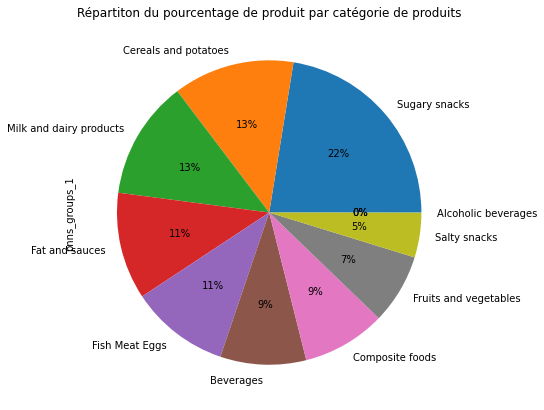

In [6]:
# Pie chart catégorie de produits
plt.figure(figsize=(20,7)).patch.set_facecolor('white')
df["pnns_groups_1"].value_counts(normalize=True).plot(kind='pie', autopct='%.0f%%')
plt.title('Répartiton du pourcentage de produit par catégorie de produits')
plt.show()

In [7]:
df_nutriscore = (df.groupby(by= 'nutriscore_grade')['code'].count()).reset_index()
df_ecoscore = (df.groupby(by= 'ecoscore_grade')['code'].count()).reset_index()
df_nova_group = (df.groupby(by= 'nova_group')['code'].count()).reset_index()

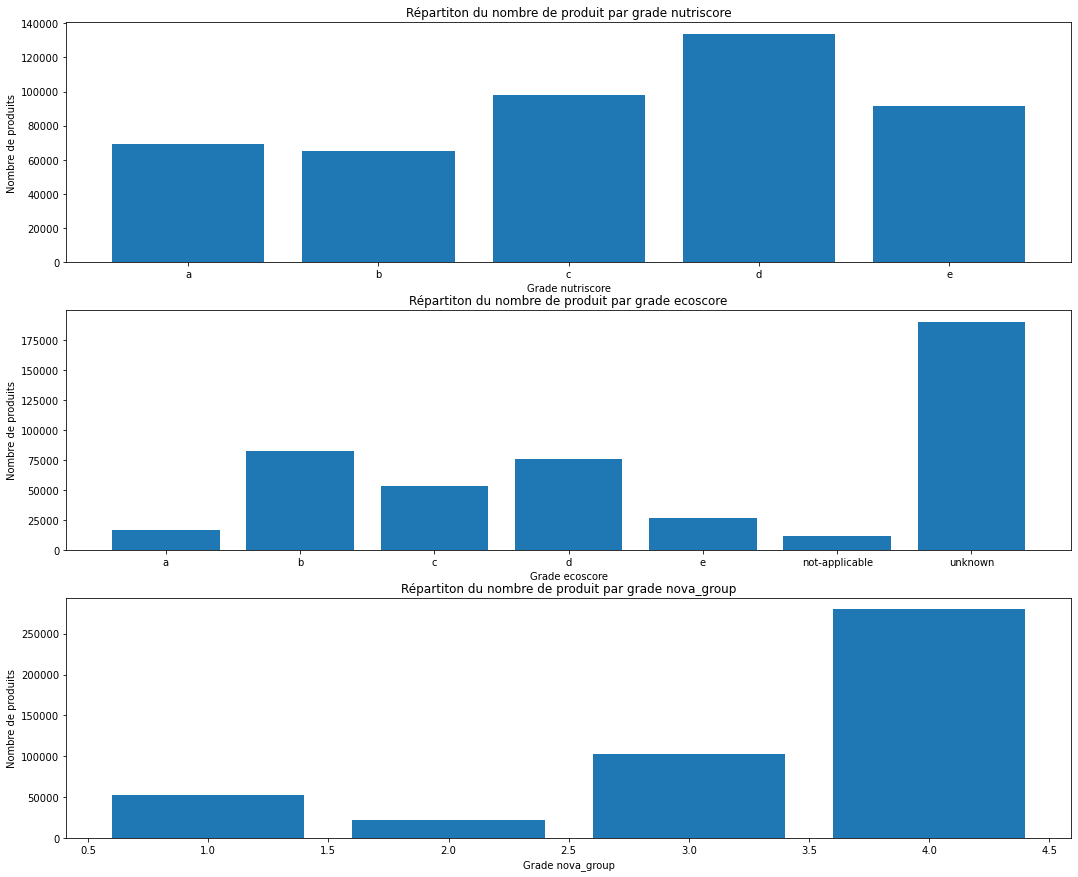

In [8]:
# Bar chart nutriscore
plt.figure(figsize=(18,15)).patch.set_facecolor('white')
plt.subplot(3,1,1)
plt.bar(df_nutriscore['nutriscore_grade'],df_nutriscore['code'] )
plt.title('Répartiton du nombre de produit par grade nutriscore')
plt.xlabel('Grade nutriscore')
plt.ylabel('Nombre de produits')

plt.subplot(3,1,2)
plt.bar(df_ecoscore['ecoscore_grade'],df_ecoscore['code'] )
plt.title('Répartiton du nombre de produit par grade ecoscore')
plt.xlabel('Grade ecoscore')
plt.ylabel('Nombre de produits')

plt.subplot(3,1,3)
plt.bar(df_nova_group['nova_group'],df_nova_group['code'] )
plt.title('Répartiton du nombre de produit par grade nova_group')
plt.xlabel('Grade nova_group')
plt.ylabel('Nombre de produits')
plt.show()

Grâce à ce graphique on peut voir que pour le nutriscore et le nova group, la plupart des produits sont dans les catégories les plus mauvaises. 

In [9]:
df.columns

Index(['code', 'product_name', 'brands', 'pnns_groups_1', 'categories',
       'main_category_en', 'countries_en', 'sugars_100g', 'salt_100g',
       'sodium_100g', 'proteins_100g', 'energy_100g', 'carbohydrates_100g',
       'saturated-fat_100g', 'fat_100g', 'additives_n', 'nutriscore_grade',
       'nova_group', 'ecoscore_grade'],
      dtype='object')

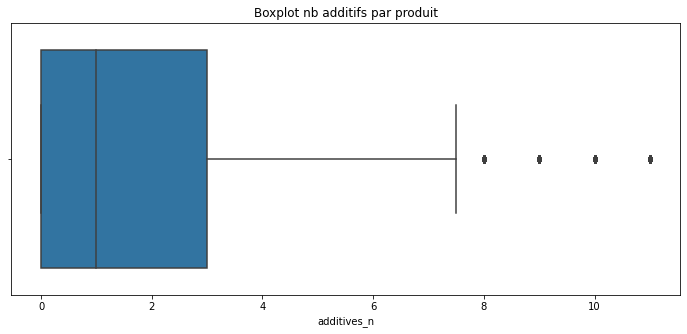

In [10]:
plt.figure(figsize=(12,5))
plt.title('Boxplot nb additifs par produit')
sns.boxplot(data=df, x='additives_n')
plt.show()

Nous pouvons voir que plus de 75% de nos produits ont moins de 3 additifs

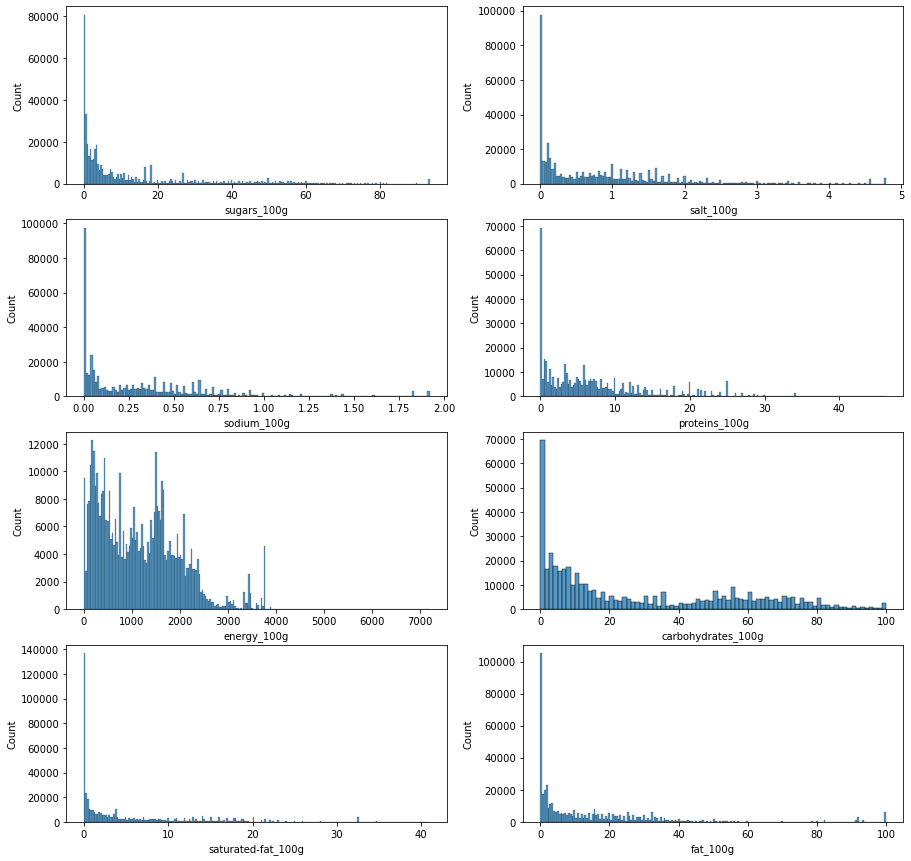

In [11]:
colonne_100g = ['sugars_100g', 'salt_100g','sodium_100g', 'proteins_100g', 'energy_100g', 'carbohydrates_100g','saturated-fat_100g', 'fat_100g']
df_100g = df[colonne_100g]
plt.figure(figsize=(15,15))
for i in df_100g.columns:
    plt.subplot(4,2, df_100g.columns.get_loc(i)+1)
    sns.histplot(data=df_100g,x=i)

Pour toutes nos variables sur les valeurs nutritionnelles des produits, la valeur qui ressort largement à chaque fois est une valeur proche de 0, il y a une forte tendance à ce niveau. Nous verrons dans les analyses futures et notamment dans l'analyse bivariée, plus en détail ces données croisées avec les catégories des produits.

## Analyse bivariée

L'analyse bivariée est une analyse de la relation entre deux variables. 
<br> Une première chose que l'on peut faire est d'afficher une matrice de corrélation de nos données ainsi qu'un pairplot. Cela nous permettra d'identifié de possiblé corrélation entre deux variables **numériques**

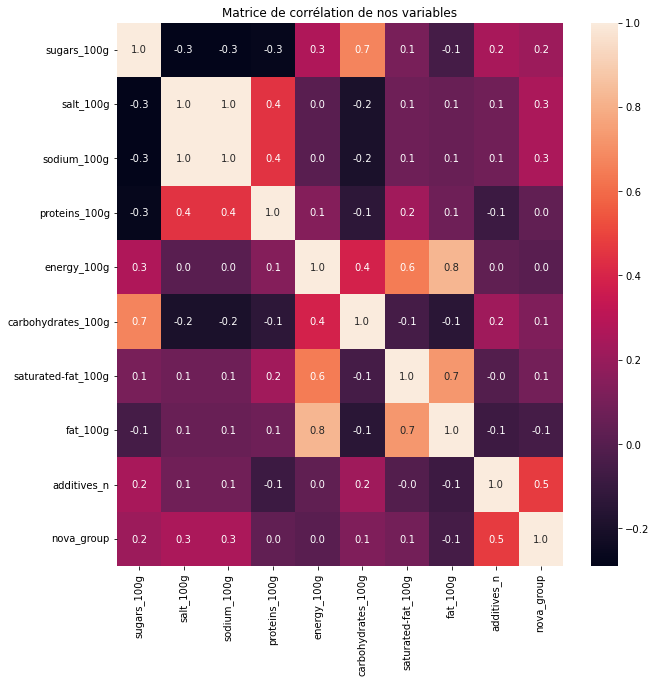

In [12]:
#Matrice de corrélation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt=".1f")
plt.title('Matrice de corrélation de nos variables')
plt.show()

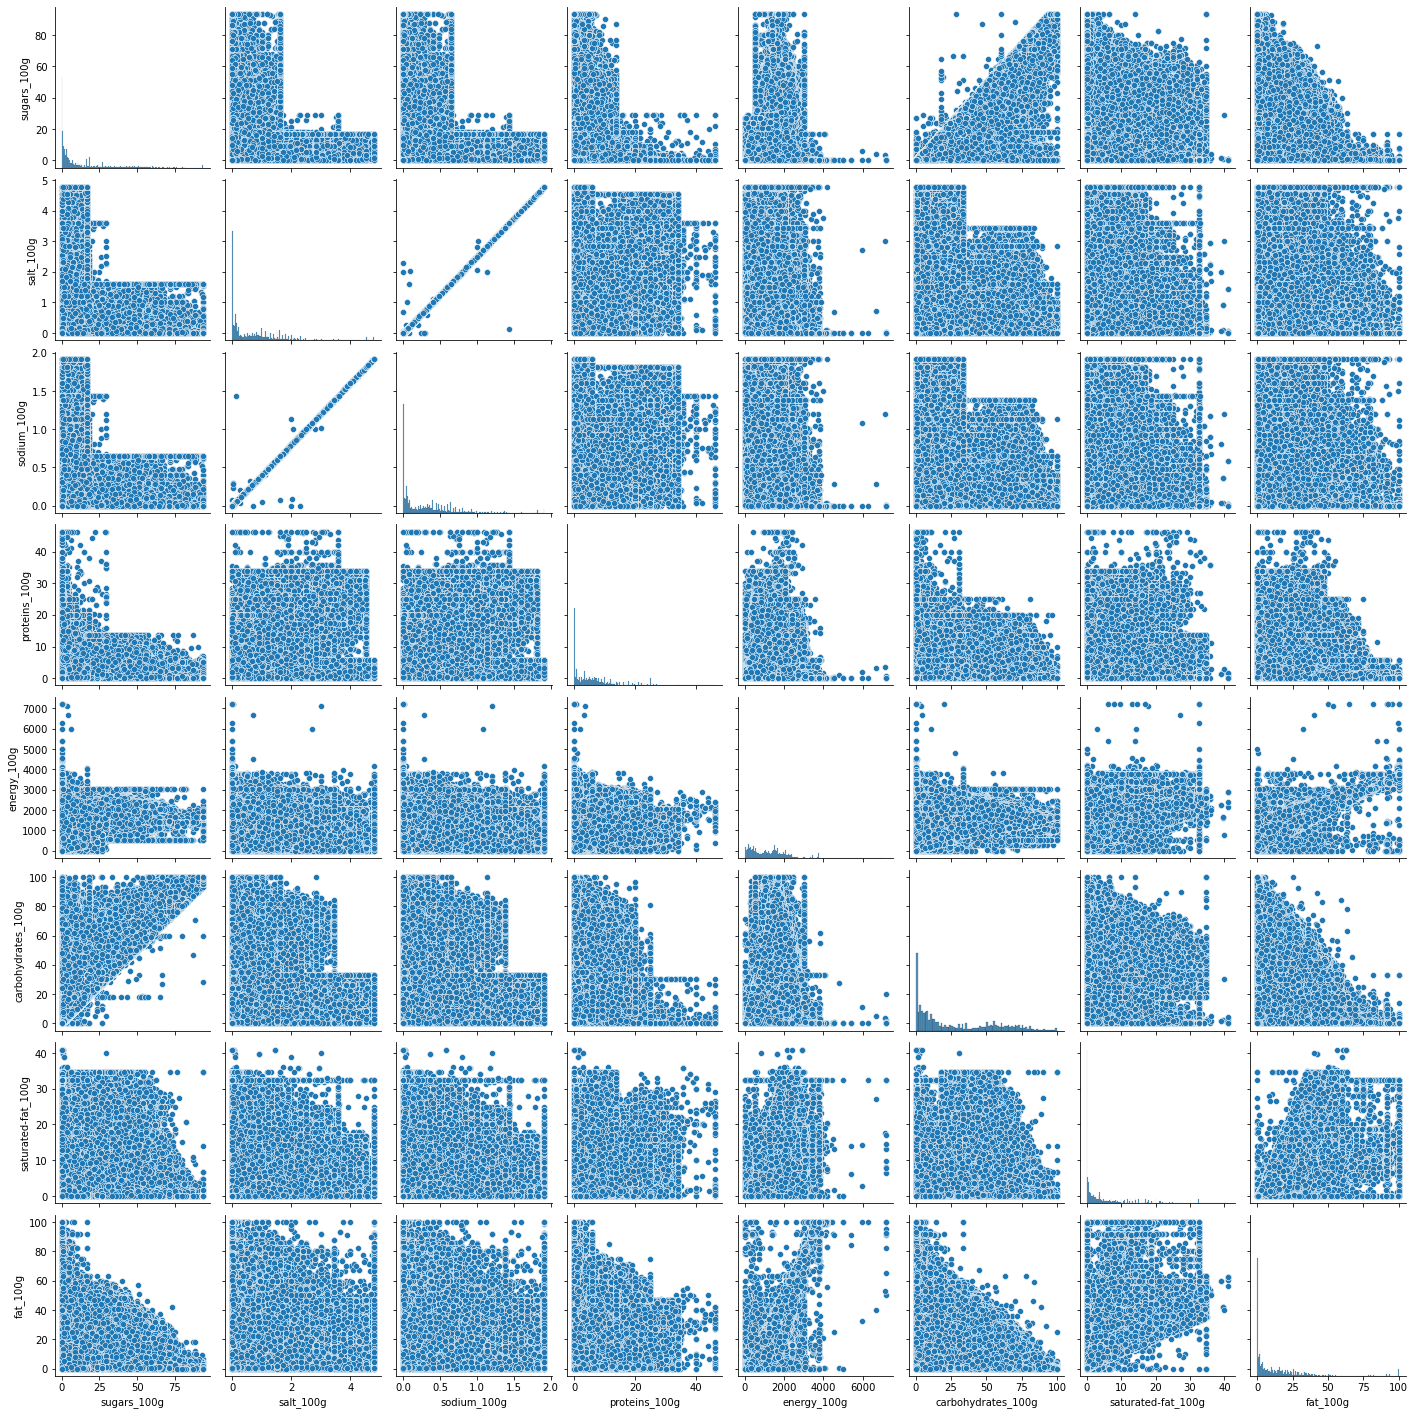

In [13]:
sns.pairplot(data=df_100g)

Ce que l'on peut voir grâce à la matrice de corrélation ainsi qu'au pariplot est une relation presque parfaite entre le sel et le sodium, il est donc inutile de garder les deux. 
<br> Ensuite, dans le pairplot nous ne pouvons pas tirer grand chose comme conclusion. Nous affinerons l'analyse par catégorie afin de tirer plus d'informations

In [14]:
df_100g_par_categorie = (df.groupby(by = 'pnns_groups_1')[['sugars_100g', 'salt_100g','sodium_100g', 'proteins_100g', 'energy_100g', 'carbohydrates_100g','saturated-fat_100g', 'fat_100g','additives_n']].mean()).reset_index()
df_100g_par_categorie.head(10)


,pnns_groups_1,sugars_100g,salt_100g,sodium_100g,proteins_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fat_100g,additives_n
0,Alcoholic beverages,3.686620,0.013986,0.005594,0.329074,103.476852,4.410926,0.051296,0.065926,1.037037
1,Beverages,7.031358,0.045913,0.018365,0.349314,190.803032,8.183188,0.054500,0.308682,1.740786
2,Cereals and potatoes,5.848436,0.704466,0.281792,9.388672,1326.137133,53.645810,1.032522,5.220412,1.176488
3,Composite foods,2.674634,1.068634,0.427335,7.276696,768.618864,19.869534,2.473618,7.319750,2.815991
4,Fat and sauces,4.667020,1.299409,0.519728,1.524297,1705.174248,9.106867,7.496405,39.858662,1.146931
5,Fish Meat Eggs,0.885362,1.884219,0.753690,18.295006,872.562984,2.403722,4.430362,13.371277,1.830591
6,Fruits and vegetables,7.707430,0.368786,0.147506,1.817712,313.009908,13.058153,0.109242,0.564294,0.508714
7,Milk and dairy products,7.078531,0.779086,0.311653,11.136207,878.422758,8.921709,9.082057,14.250901,1.660509
8,Salty snacks,2.767645,1.412226,0.564895,9.174804,1802.983744,28.245408,6.509592,31.074586,1.344139
9,Sugary snacks,40.001748,0.411692,0.164705,4.911277,1748.923490,60.431146,8.461297,17.510991,3.297776


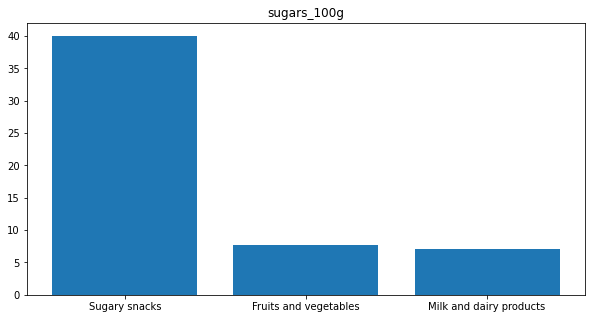

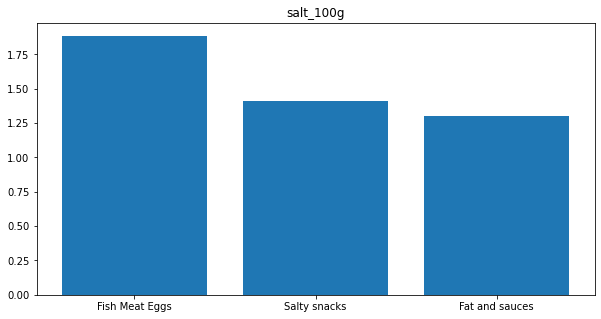

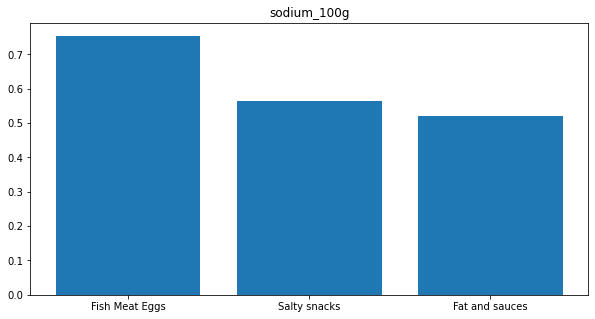

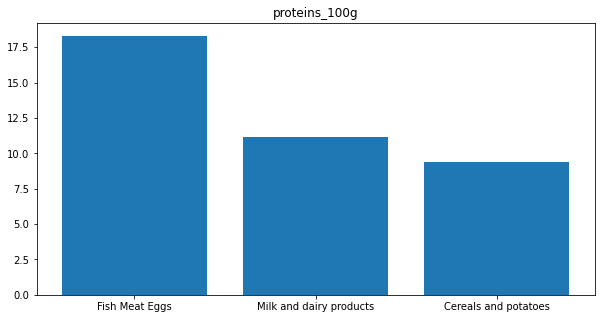

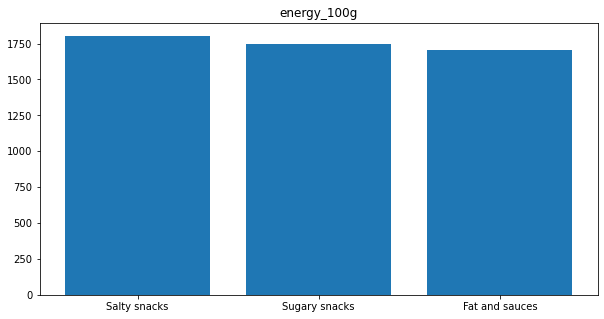

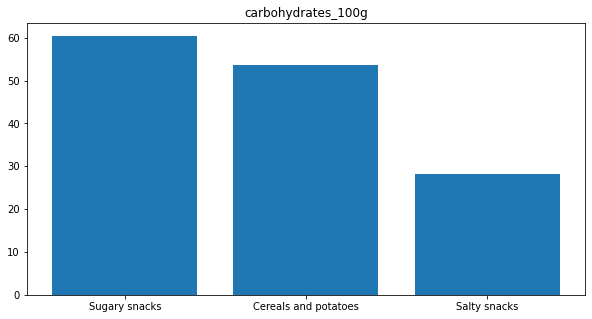

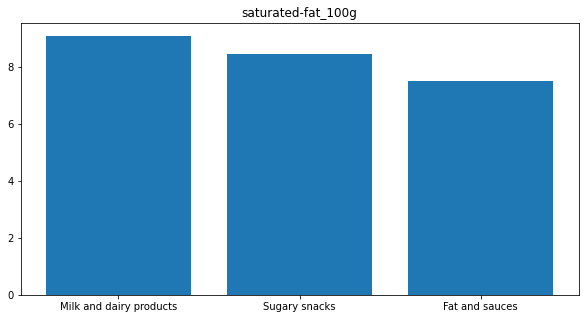

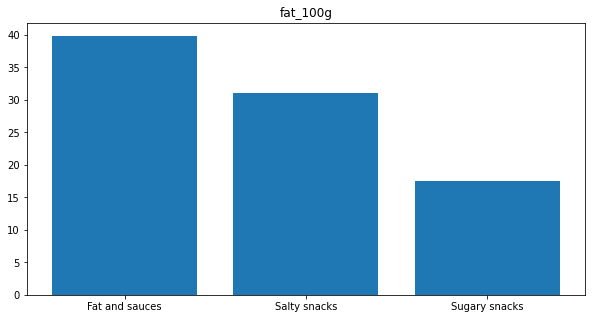

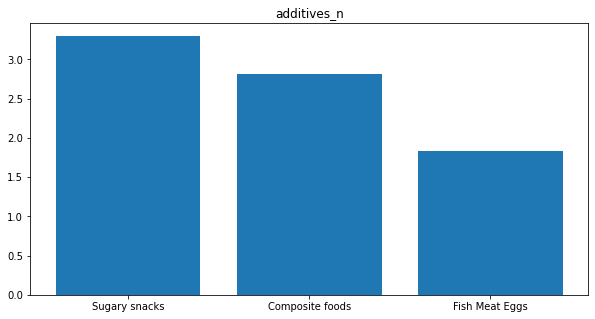

In [15]:
#Affichage pour chaque variable les catégories qui présentent le plus fort taux
for col in df_100g_par_categorie.columns[1:]:
    top_3 = df_100g_par_categorie.nlargest(3, col)
    plt.figure(figsize=(10,5))
    plt.bar(top_3['pnns_groups_1'], top_3[col])
    plt.title(col)
    plt.show()

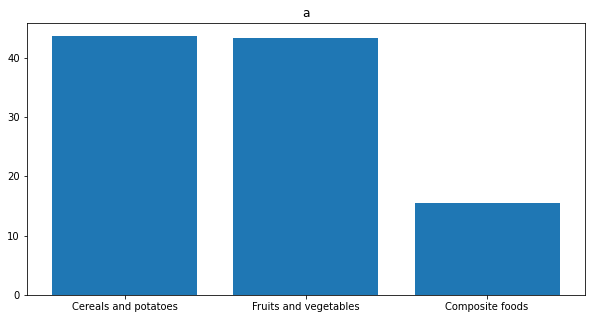

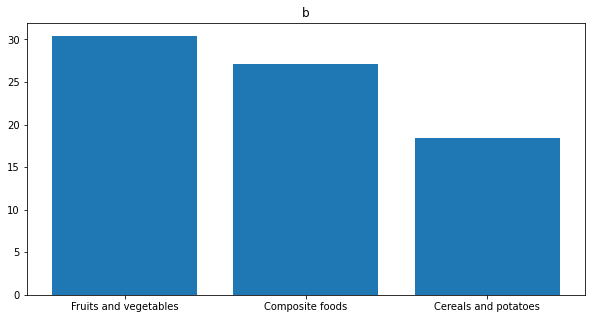

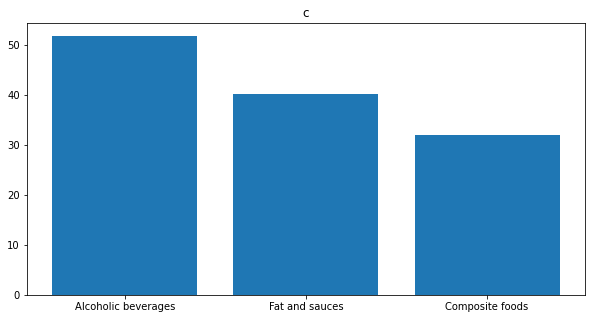

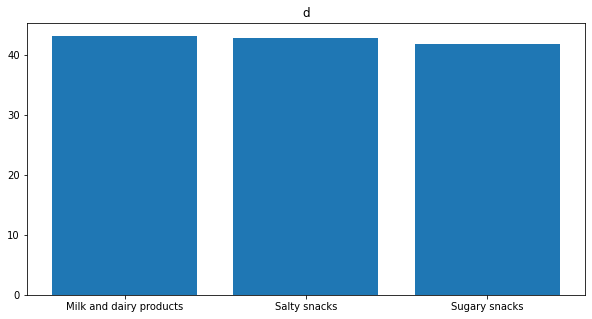

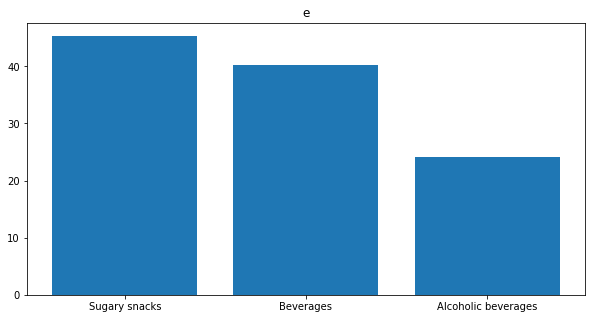

In [16]:
df_categ_nutrisocre = df.groupby(['pnns_groups_1', 'nutriscore_grade']).size().reset_index(name='Nombre')

# Calculer le nombre total de produits par catégorie
total_produits = df_categ_nutrisocre.groupby('pnns_groups_1')['Nombre'].transform('sum')

# Calculer la proportion pour chaque nutriscore par catégorie
df_categ_nutrisocre['proportion'] = round(100*df_categ_nutrisocre['Nombre'] / total_produits,2)
df_categ_nutrisocre

#Pivoter le dataframe
pivot = df_categ_nutrisocre.pivot_table(index='pnns_groups_1', columns='nutriscore_grade', values='proportion').reset_index()

#Affichage pour chaque variable les catégories qui présentent le plus fort taux
for grade in pivot.columns[1:]:
    top_3 = pivot.nlargest(3, grade)
    plt.figure(figsize=(10,5))
    plt.bar(top_3['pnns_groups_1'], top_3[grade])
    plt.title(grade)
    plt.show()
    

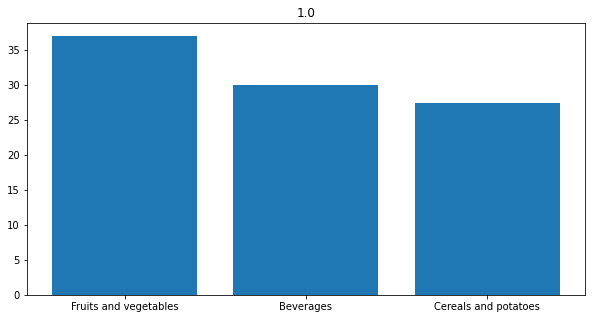

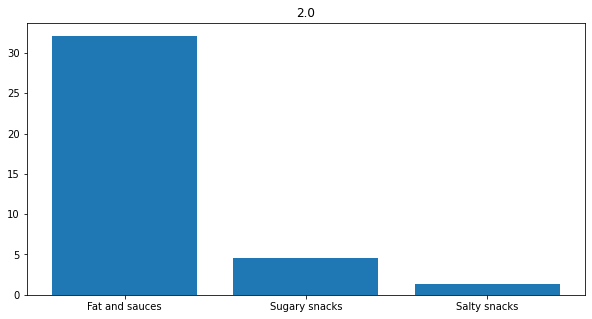

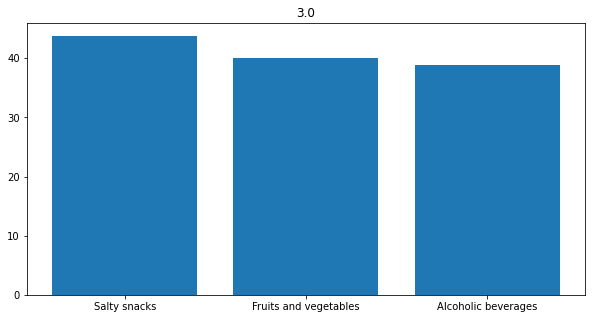

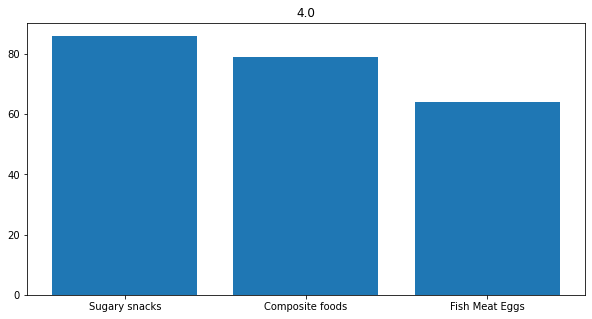

In [17]:
df_categ_nova_group = df.groupby(['pnns_groups_1', 'nova_group']).size().reset_index(name='Nombre')

# Calculer le nombre total de produits par catégorie
total_produits = df_categ_nova_group.groupby('pnns_groups_1')['Nombre'].transform('sum')

# Calculer la proportion pour chaque nutriscore par catégorie
df_categ_nova_group['proportion'] = round(100*df_categ_nova_group['Nombre'] / total_produits,2)

#Pivoter le dataframe
pivot = df_categ_nova_group.pivot_table(index='pnns_groups_1', columns='nova_group', values='proportion').reset_index()

#Affichage pour chaque variable les catégories qui présentent le plus fort taux
for grade in pivot.columns[1:]:
    top_3 = pivot.nlargest(3, grade)
    plt.figure(figsize=(10,5))
    plt.bar(top_3['pnns_groups_1'], top_3[grade])
    plt.title(grade)
    plt.show()

#### ANOVA

Afin de savoir si nous avons un lien entre le nombre d'additifs et le nova_group ainsi que le nutriscore et les catégories, nous allons effectuer une analyse des variances (ANOVA)

In [99]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st

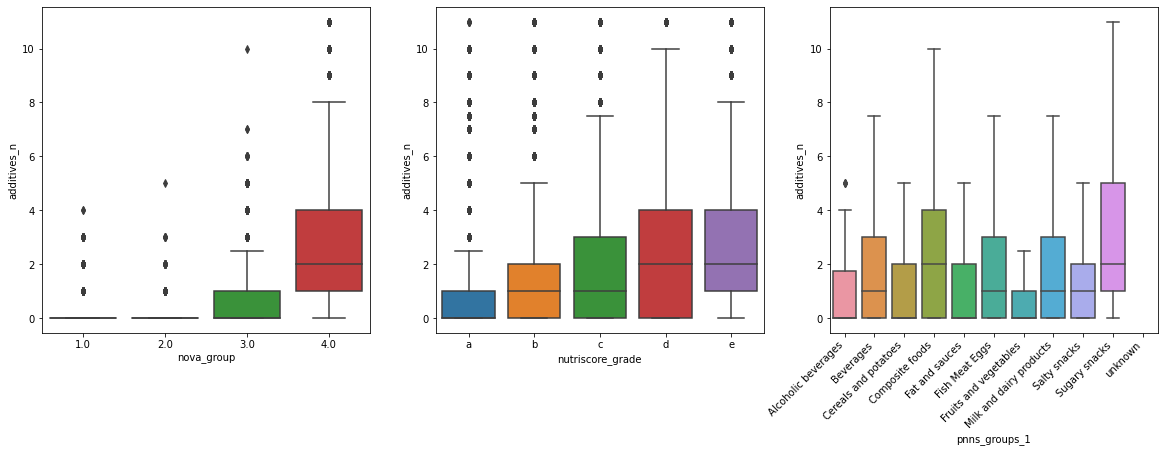

In [107]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title
sns.boxplot(data=df, x='nova_group', y='additives_n' )
plt.subplot(1,3,2)
sns.boxplot(data=df, x='nutriscore_grade', y='additives_n' )
plt.subplot(1,3,3)
sns.boxplot(data=df, x='pnns_groups_1', y='additives_n' )
plt.xticks(rotation=45, ha='right')
plt.show()

A première vue, on peut penser qu'il y a une relation forte entre nova_group et le nombre d'additifs. Avec le nutriscore grade et le pnns_groups, nous pouvons deviner qu'il y a également une relation avec le nombre d'additifs. Afin de valider cela nous allons faire une ANOVA.

<br>Pour l'anova, si la p_valeur est inférieur au seuil de significativité de 5% alors les différences entre certaines moyennes sont statistiquement significatives.
<br>Si la p_valeur est supérieur au seuil de significativé de 5% alors les différences entre certaines moyennes ne sont pas statistiquement significatives.

In [114]:
model_nova_group = smf.ols('additives_n ~ nova_group', data=df).fit()
resultats_nova_group = sm.stats.anova_lm(model_nova_group)
resultats_nova_group

,df,sum_sq,mean_sq,F,PR(>F)
nova_group,3.0,8.261039e+05,275367.955840,65367.871818,0.0
Residual,457714.0,1.928161e+06,4.212589,NaN,NaN


A partir des résultats que nous voyons ci-dessus, nous pouvons dire qu'il y a une différence significative entre les groupes de la variables nova_group pour le nombre d'additifs. En effet, le p_value est inférieur à notre seuil de significativé (<5%). De plus, la statistique F est élevé ce qui montre une grande variabilité entre les moyennes des nova_group par rapport à la variabilité à l'intérieur des nova_group.

In [115]:
model_nutriscore = smf.ols('additives_n ~ nutriscore_grade', data=df).fit()
resultats_nutriscore = sm.stats.anova_lm(model_nutriscore)
resultats_nutriscore

,df,sum_sq,mean_sq,F,PR(>F)
nutriscore_grade,4.0,2.072210e+05,51805.242615,9309.59016,0.0
Residual,457713.0,2.547044e+06,5.564718,NaN,NaN


In [116]:
model_pnns = smf.ols('additives_n ~ pnns_groups_1', data=df).fit()
resultat_pnns = sm.stats.anova_lm(model_pnns)
resultat_pnns

,df,sum_sq,mean_sq,F,PR(>F)
pnns_groups_1,10.0,3.718859e+05,37188.587824,7144.751633,0.0
Residual,457708.0,2.382380e+06,5.205022,NaN,NaN


Pareil pour le nutriscore et les pnns_groups, il y a bien une relation entre ces variable et le nombre d'additifs. En effet, la p_value est inférieur à 5% soit notre seuil de significativité.

## Analyse multivariée


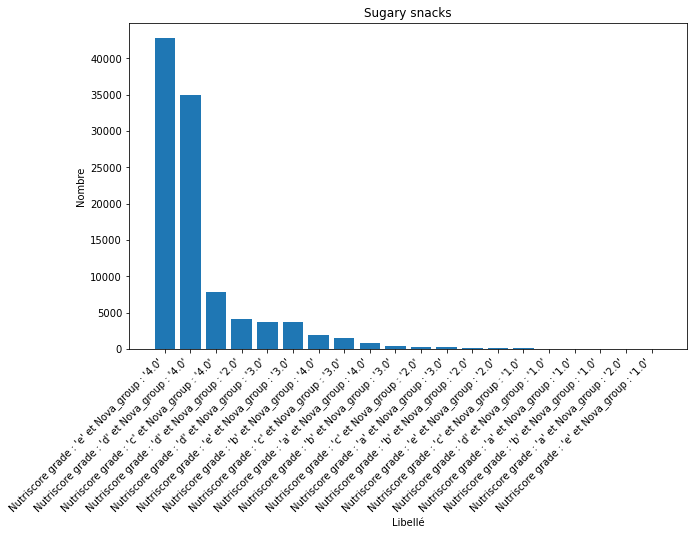

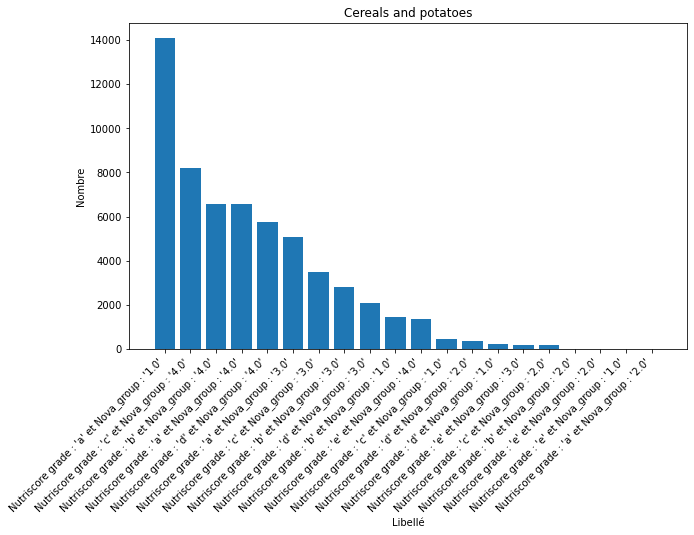

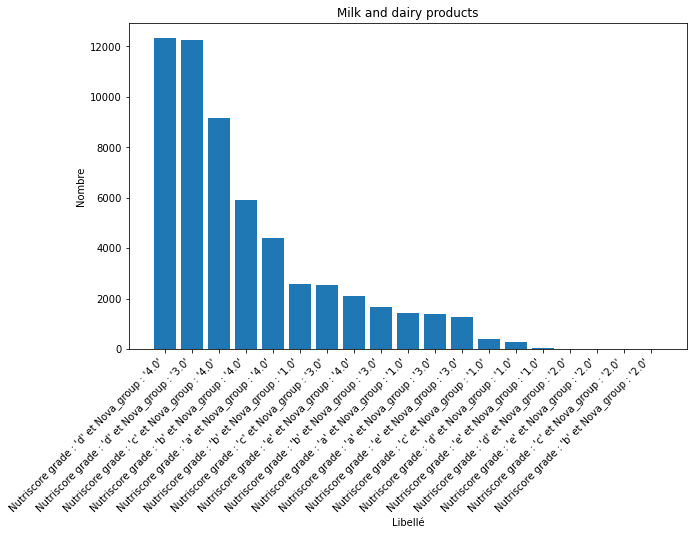

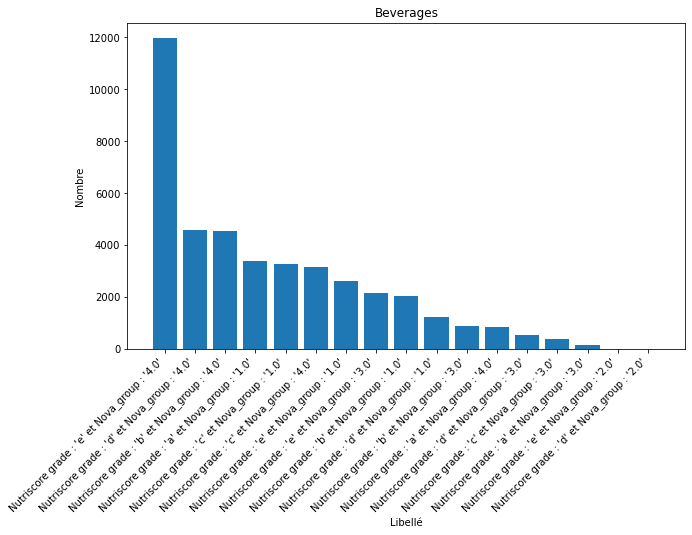

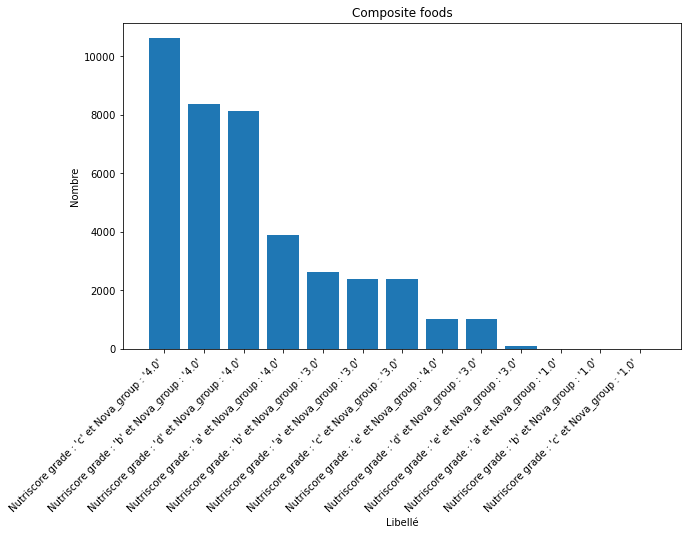

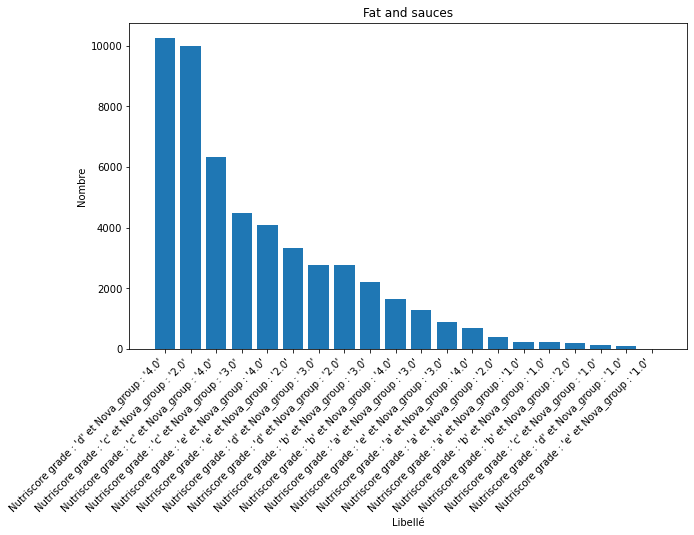

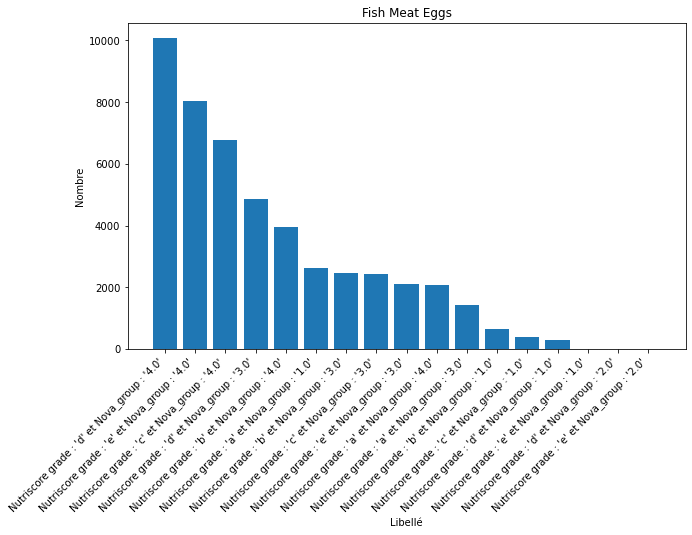

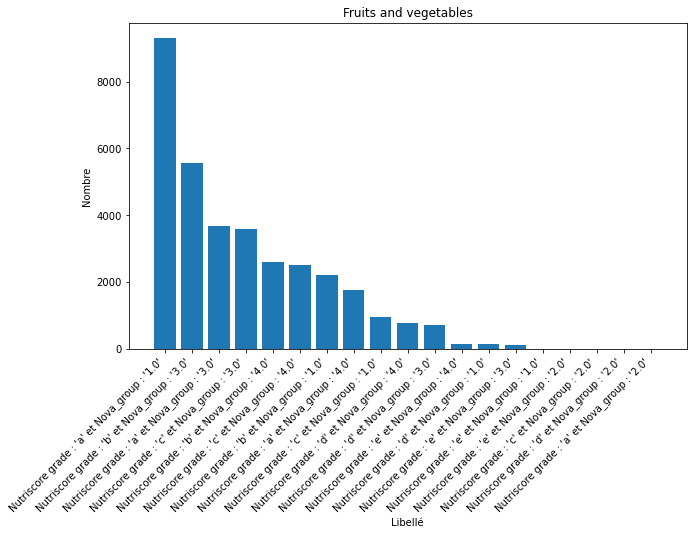

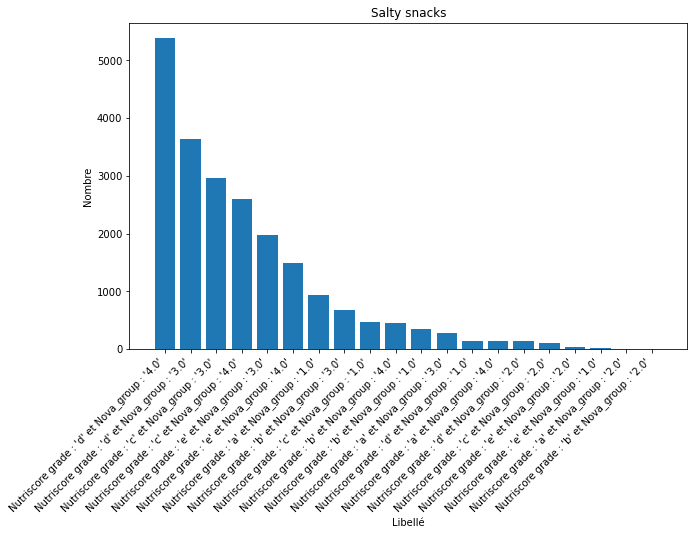

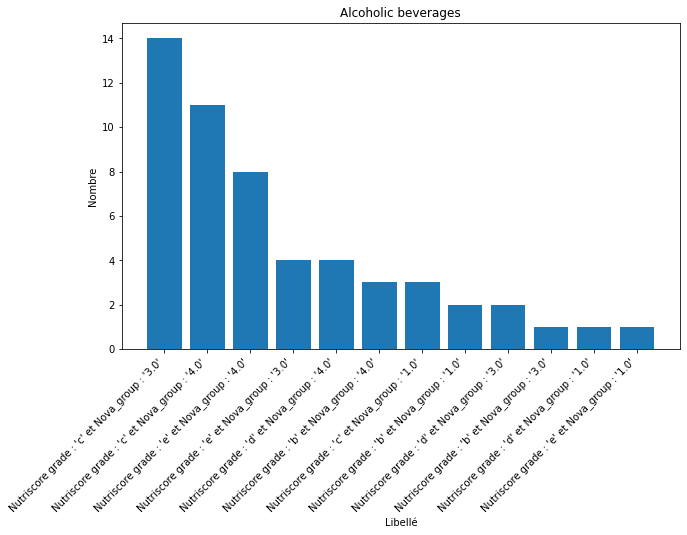

In [117]:
df_categ_nova_group_nutriscore = df.groupby(['pnns_groups_1', 'nutriscore_grade','nova_group']).size().reset_index(name='Nombre') 
df_categ_nova_group_nutriscore=df_categ_nova_group_nutriscore.sort_values(by='Nombre', ascending=False)
top_3_combinaisons = df_categ_nova_group_nutriscore.groupby('pnns_groups_1').head(3).sort_values(by=['pnns_groups_1','Nombre'], ascending=[True, False])

df_categ_nova_group_nutriscore['libellé'] = "Nutriscore grade : '" + df_categ_nova_group_nutriscore['nutriscore_grade'].astype(str) + "' et Nova_group : '" + df_categ_nova_group_nutriscore['nova_group'].astype(str) + "'"
df_categ_nova_group_nutriscore = df_categ_nova_group_nutriscore[['pnns_groups_1','libellé','Nombre']]
df_categ_nova_group_nutriscore = df_categ_nova_group_nutriscore[df_categ_nova_group_nutriscore['Nombre'] > 0]
df_categ_nova_group_nutriscore.head(20)

# Créer un graphique à barres pour chaque catégorie
for categ in df_categ_nova_group_nutriscore['pnns_groups_1'].unique():
    plt.figure(figsize=(10, 6))
    data = df_categ_nova_group_nutriscore[df_categ_nova_group_nutriscore['pnns_groups_1'] == categ]
    plt.bar(data['libellé'], data['Nombre'])
    plt.xlabel('Libellé')
    plt.ylabel('Nombre')
    plt.title(categ)
    plt.xticks(rotation=45, ha='right')
    plt.show()

#### Analyse en composante principale

In [83]:
from sklearn.decomposition import PCA

In [52]:
def correlation_graph(model, x_y, nom_colonnes) :

    # Extrait x et y 
    x,y=x_y

    # Taille du graphique
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, model.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                model.components_[x, i],  
                model.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(model.components_[x, i] + 0.05,
                model.components_[y, i] + 0.05,
                nom_colonnes[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*model.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*model.explained_variance_ratio_[y],1)))
    
    #Titre du graphique
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [82]:
colonnne_acp = ['pnns_groups_1','sugars_100g','salt_100g','sodium_100g','proteins_100g','carbohydrates_100g','saturated-fat_100g','fat_100g','energy_100g', 'additives_n']
df_acp = df[colonnne_acp]
df_acp= df_acp.set_index('pnns_groups_1')
df_acp_stand = (df_acp-df_acp.mean())/df_acp.std()


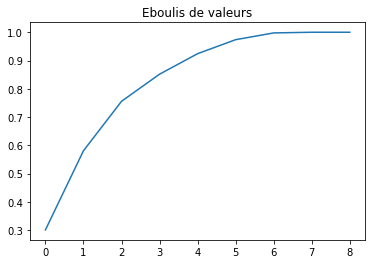

In [84]:
#Test pour connaitre notre nombre de composantes à garder
n_comp = df_acp_stand.shape[1]
model_acp = PCA(n_components=n_comp)
X_reduced = model_acp.fit_transform(df_acp_stand)

#Pourcentage de variance préservé après chaque composante
plt.title('Eboulis de valeurs')
plt.plot(np.cumsum(model_acp.explained_variance_ratio_))

In [92]:
#Nombre de composantes qui préserve 97% de notre variance
np.argmax(np.cumsum(model_acp.explained_variance_ratio_)>0.97)

5

In [86]:
#ACP sur 5 composantes principales
n_compo_reel = 5
model_new = PCA(n_components=n_compo_reel)
X_reduit_2 = model_new.fit_transform(df_acp_stand)

In [87]:
#récupération index de notre dataset 
df_index = df_acp_stand.index

#Création numéro de nos composantes
liste_num_composante_2 = range(1, n_compo_reel+1)

#Création du df de nos composantes
df_acp = X_reduit_2
df_acp = pd.DataFrame(df_acp)
df_acp.index = df_index
df_acp.columns = [f"F{i}" for i in liste_num_composante_2]
df_acp.head()

,F1,F2,F3,F4,F5
pnns_groups_1,,,,,
Cereals and potatoes,-0.537014,-1.007632,-0.180503,0.147821,0.854858
Sugary snacks,-1.147405,1.967897,-0.227773,-0.061251,-0.938071
Fruits and vegetables,-1.945345,-0.443176,-0.388961,-0.553844,-0.604474
Fat and sauces,0.951013,3.714583,-2.915939,0.996893,-1.033972
Composite foods,-0.217059,-1.345566,-0.361727,0.193456,0.237380


In [88]:
#Explication de nos composantes

pcs = model_new.components_
pcs = pd.DataFrame(pcs)

nom_colonnes = df_acp_stand.columns

x_list = range(1, n_compo_reel+1)
list(x_list)

pcs.columns = nom_colonnes
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,sugars_100g,salt_100g,sodium_100g,proteins_100g,carbohydrates_100g,saturated-fat_100g,fat_100g,energy_100g,additives_n
F1,-0.33,0.50,0.50,0.40,-0.28,0.25,0.26,0.14,-0.07
F2,0.30,-0.14,-0.14,-0.02,0.26,0.47,0.49,0.58,0.05
F3,0.40,0.36,0.36,0.10,0.50,-0.14,-0.27,0.04,0.49
F4,-0.15,0.01,0.01,-0.46,-0.38,0.11,0.21,-0.10,0.74
F5,-0.11,-0.31,-0.31,0.75,-0.07,0.16,-0.16,-0.08,0.43


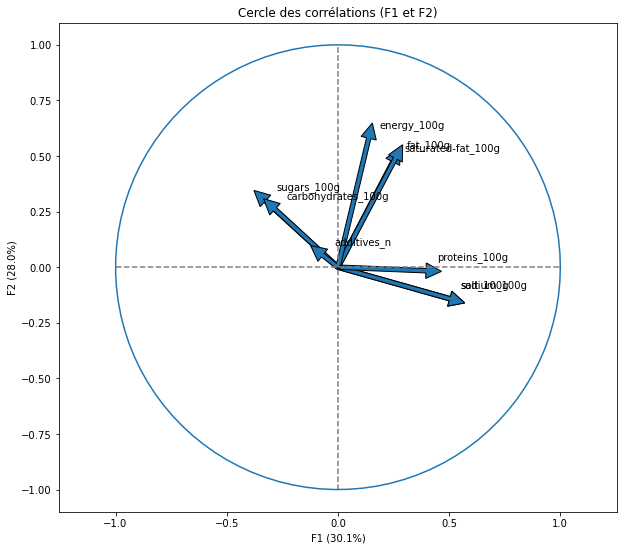

In [89]:
#Visualisation du cercle des corrélations sur nos deux 1ères composantes
x_y = (0,1)
correlation_graph(model_new, x_y, nom_colonnes)

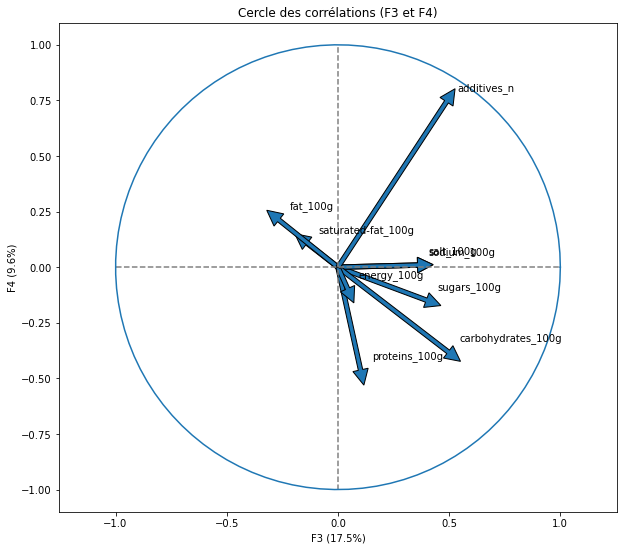

In [91]:
#Visualisation du cercle des corrélations sur F3 et F4
x_y = (2,3)
correlation_graph(model_new, x_y, nom_colonnes)